In [ ]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for timing computations
import time

# for data visualization
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-3e4a69c6af45>:23: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data = data[data['total sulfur dioxide']<200] # drop a few outliers

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: xlabel='residual sugar', ylabel='Count'>

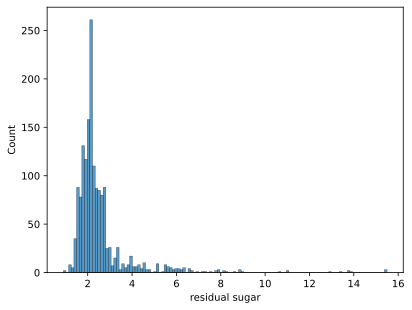

In [ ]:
import seaborn as sns

sns.histplot(data["residual sugar"])

In [ ]:
data.loc[:, "boolean sugar"] = 0.0
data.loc[data["residual sugar"] > 2.16, "boolean sugar"] = 1.0
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolean sugar
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.0


In [ ]:
data.loc[:, "boolean sugar"].value_counts()

,count
boolean sugar,
1.0,845
0.0,752


In [ ]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'boolean sugar'],
      dtype='object')

In [ ]:
# z-score all columns except for quality
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop(['residual sugar', "boolean sugar"])
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)
#
# # create a new column for binarized (boolean) quality

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolean sugar
0,-0.528350,0.960657,-1.391823,1.9,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,-0.786623,0.0
1,-0.298673,1.966614,-1.391823,2.6,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,-0.786623,1.0
2,-0.298673,1.295976,-1.185980,2.3,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,-0.786623,1.0
3,1.653579,-1.386577,1.489975,1.9,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,0.453492,0.0
4,-0.528350,0.960657,-1.391823,1.9,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,-0.786623,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217380,0.401792,-0.980138,2.0,0.052836,1.547828,-0.068233,-0.982759,0.899027,-0.462207,0.074599,-0.786623,0.0
1595,-1.389638,0.122359,-0.877216,2.2,-0.542132,2.218623,0.151778,-0.865964,1.353377,0.599872,0.732539,0.453492,1.0
1596,-1.159961,-0.101187,-0.722834,2.3,-0.244648,1.260344,-0.193954,-0.536815,0.704305,0.540868,0.544556,0.453492,1.0
1597,-1.389638,0.653281,-0.774295,2.0,-0.265897,1.547828,-0.068233,-0.680154,1.677912,0.304850,-0.207376,-0.786623,0.0


In [ ]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['boolean sugar'].values ).float()
labels = labels[:,None] # transform to matrix

In [ ]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_dataDataset = TensorDataset(train_data,train_labels)
test_dataDataset  = TensorDataset(test_data,test_labels)

In [ ]:
# create a class for the model

class ANNwine(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(11,16)
    self.batchNorm1 = nn.BatchNorm1d(16)

    ### hidden layers
    self.fc1 = nn.Linear(16,32)
    self.batchNorm2 = nn.BatchNorm1d(32)

    self.fc2 = nn.Linear(32,32)
    self.batchNorm3 = nn.BatchNorm1d(32)

    ### output layer
    self.output = nn.Linear(32,1)

  # forward pass
  def forward(self,x):
    x = self.input(x)
    x = self.batchNorm1(x)
    x = F.relu(x)

    x = self.fc1(x)
    x = self.batchNorm2(x)
    x = F.relu(x)

    x = self.fc2(x)
    x = self.batchNorm3(x)
    x = F.relu(x)

    x = self.output(x)

    return x

In [ ]:
# a function that trains the model

# global parameter
numepochs = 1000

def trainTheModel():

  # loss function and optimizer
  lossfun = nn.BCEWithLogitsLoss()
  # L2 Reg Metaparam is Set
  optimizer = torch.optim.SGD(winenet.parameters(),lr=.01, weight_decay=.02)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    winenet.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = winenet(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    winenet.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = winenet(X)
    testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )

  # function output
  return trainAcc,testAcc,losses

In [ ]:
train_loader = DataLoader(train_dataDataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataDataset, batch_size=test_dataDataset.tensors[0].shape[0])
winenet = ANNwine()
trainAcc,testAcc,losses = trainTheModel()

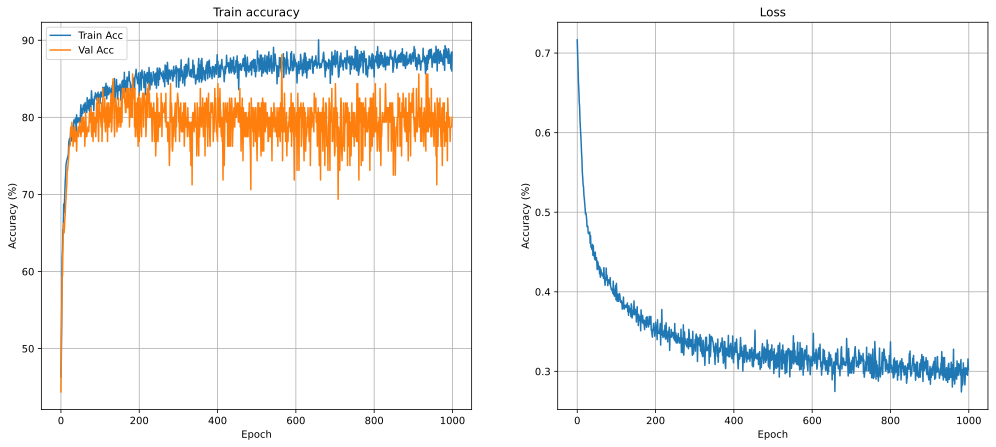

In [ ]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(17,7))

ax[0].set_title('Train accuracy')
ax[0].plot(trainAcc, label="Train Acc")
ax[0].plot(testAcc, label="Val Acc")
ax[0].legend()

ax[1].set_title('Loss')
ax[1].plot(losses, label="Loss")

# common features
for i in range(2):
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  # ax[i].set_ylim([50,100])
  ax[i].grid()

plt.show()



# bar plot of computation time

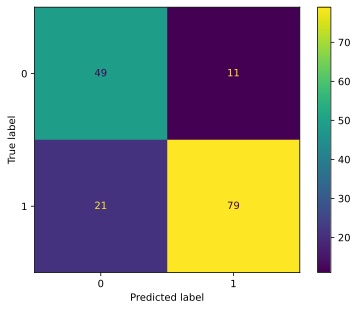

In [ ]:
from sklearn import metrics

y_pred = winenet(test_data)
y_pred_binary = (y_pred > 0).float().detach().numpy()

confusion_matrix = metrics.confusion_matrix(y_pred_binary, test_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()


In [ ]:
data.shape

(1597, 13)

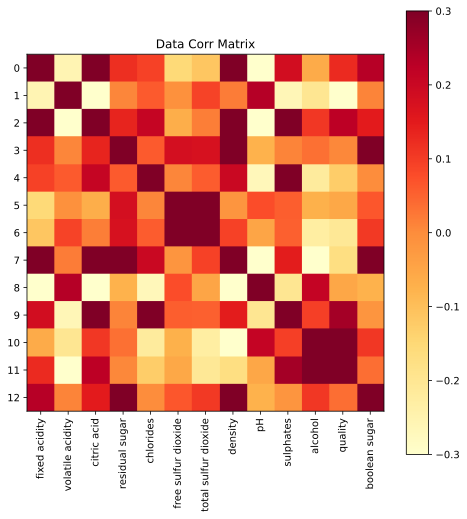

In [ ]:
fig = plt.figure(figsize=(8, 8))

plt.title("Data Corr Matrix")
plt.imshow(np.corrcoef(data.T), vmin=-.3, vmax=.3, cmap="YlOrRd")
plt.xticks(range(len(data.keys())), labels=data.keys(), rotation=90)
plt.yticks(range(len(data.keys())), label=data.keys())
plt.colorbar()
plt.show()